In [24]:
from owslib.wms import WebMapService
url = 'https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2016_Land_Cover_L48/wms?service=WMS'
wms = WebMapService(url, version='1.1.1')
print(wms.identification.type)
print(wms.identification.title)
print(wms.identification.abstract)
#wms.identification.version
print(list(wms.contents))
print([op.name for op in wms.operations])

OGC:WMS
GeoServer Web Map Service
A compliant implementation of WMS plus most of the SLD extension (dynamic styling). Can also generate PDF, SVG, KML, GeoRSS
['NLCD_2016_Land_Cover_L48']
['GetCapabilities', 'GetMap', 'GetFeatureInfo', 'DescribeLayer', 'GetLegendGraphic', 'GetStyles']


In [28]:
wms['NLCD_2016_Land_Cover_L48'].styles

{'mrlc:mrlc_NLCD_2016_Land_Cover_L48': {'title': 'A boring default style',
  'legend': 'https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2016_Land_Cover_L48/wms?request=GetLegendGraphic&format=image%2Fpng&width=20&height=20&layer=NLCD_2016_Land_Cover_L48'}}

In [38]:
wms.getOperationByName('GetFeatureInfo').methods

[{'type': 'Get',
  'url': 'https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2016_Land_Cover_L48/wms?SERVICE=WMS&'},
 {'type': 'Post',
  'url': 'https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2016_Land_Cover_L48/wms?SERVICE=WMS&'}]

In [37]:
wms.getOperationByName('GetFeatureInfo').formatOptions

['text/plain',
 'application/vnd.ogc.gml',
 'text/xml',
 'application/vnd.ogc.gml/3.1.1',
 'text/xml; subtype=gml/3.1.1',
 'text/html',
 'application/json']

In [ ]:
tesdt = wms.get(layers=['NLCD_2016_Land_Cover_L48'],
                 #styles=['A boring default style'],
                 srs='EPSG:4326',
                 bbox=(-112, 36, -106, 41),
                 size=(300, 250),
                 format='image/jpeg',
                 transparent=True
                )

In [25]:
wms.getOperationByName('GetMap').methods

[{'type': 'Get',
  'url': 'https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2016_Land_Cover_L48/wms?SERVICE=WMS&'}]

In [26]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'application/atom xml',
 'application/atom+xml',
 'application/json;type=utfgrid',
 'application/openlayers',
 'application/openlayers2',
 'application/openlayers3',
 'application/pdf',
 'application/rss xml',
 'application/rss+xml',
 'application/vnd.google-earth.kml',
 'application/vnd.google-earth.kml xml',
 'application/vnd.google-earth.kml+xml',
 'application/vnd.google-earth.kml+xml;mode=networklink',
 'application/vnd.google-earth.kmz',
 'application/vnd.google-earth.kmz xml',
 'application/vnd.google-earth.kmz+xml',
 'application/vnd.google-earth.kmz;mode=networklink',
 'atom',
 'image/geotiff',
 'image/geotiff8',
 'image/gif',
 'image/gif;subtype=animated',
 'image/jpeg',
 'image/png8',
 'image/png; mode=8bit',
 'image/svg',
 'image/svg xml',
 'image/svg+xml',
 'image/tiff',
 'image/tiff8',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8',
 'kml',
 'kmz',
 'openlayers',
 'rss',
 'text/html; subtype=openlayers',
 'text/html; subtype=openlayers2',
 'text/html; subtyp

geotiff

In [76]:
test = wms.getmap(   layers=['NLCD_2016_Land_Cover_L48'],
                 #styles=['A boring default style'],
                 srs='EPSG:4326',
                 bbox=(-112, 36, -106, 41),
                 size=(300, 250),
                 format='image/geotiff',
                 transparent=True
                )
with open('test.tif','wb') as f:
    f.write(test.read())

try kml

In [77]:
test = wms.getmap(   layers=['NLCD_2016_Land_Cover_L48'],
                 #styles=['A boring default style'],
                 srs='EPSG:4326',
                 bbox=(-112, 36, -106, 41),
                 size=(300, 250),
                 format='application/vnd.google-earth.kml',
                 transparent=True
                )
with open('test.kml','wb') as f:
    f.write(test.read())

In [42]:
import geopandas as gpd

# Enable fiona driver
#see https://gist.github.com/mazzma12/0a32ce693bb42b742252caabb98519db
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'


In [45]:
gdf = gpd.read_file('test.kml', driver = 'KML' )

In [46]:
gdf

,Name,Description,geometry


## open as image

In [72]:
img = wms.getmap(   layers=['NLCD_2016_Land_Cover_L48'],
                 #styles=['A boring default style'],
                 srs='EPSG:4326',
                 #bbox=(-112, 36, -106, 41),
                 #bbox = (-112,36,-111,37),
                 bbox = (-124,32,-113,42.1),
                 size=(600, 600),
                 format='image/png',
                 transparent=True
                )

In [73]:
with open('test.png','wb') as f:
    f.write(img.read())

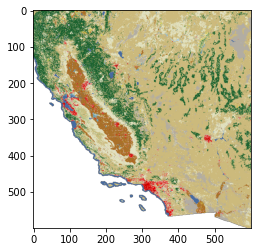

In [74]:
from matplotlib import pyplot as plt
arr = plt.imread('test.png'); plt.imshow(arr)

In [94]:
import rasterio
import rasterio.features
import rasterio.warp
import geopandas as gpd

with rasterio.open('test.tif') as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()
    
    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)
    print(dataset.indexes)
    test = dataset.read(1)

(1,)


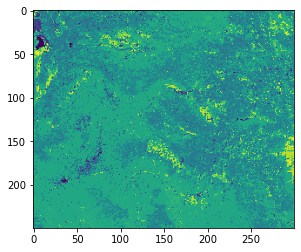

In [98]:
plt.imshow(test)

In [89]:
with rasterio.open('test.tif') as dataset:
    mask = dataset.dataset_mask()
    test = [x for x in rasterio.features.shapes(
                mask, transform=dataset.transform)]